In [ ]:
# Tạo trang R trên colab: https://colab.research.google.com/notebook#create=true&language=r
a <- 5
b <- 7
c <- a + b

In [ ]:
fruit <- c("a",'b','c')

In [ ]:
print(fruit)

[1] "a" "b" "c"


In [ ]:
print(c)

[1] 12


In [ ]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [ ]:
input = mtcars[, c('mpg', 'disp', 'hp', 'wt')]
head(input)

,mpg,disp,hp,wt
,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,160,110,2.620
Mazda RX4 Wag,21.0,160,110,2.875
Datsun 710,22.8,108,93,2.320
Hornet 4 Drive,21.4,258,110,3.215
Hornet Sportabout,18.7,360,175,3.440
Valiant,18.1,225,105,3.460


In [ ]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



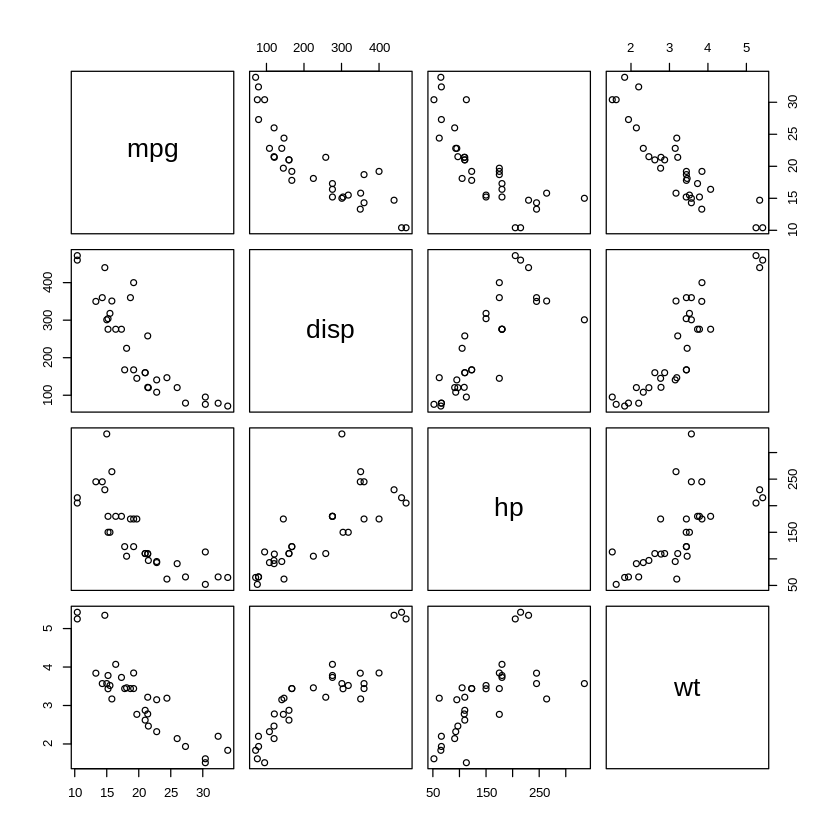

In [ ]:
pairs(~mpg + disp + hp + wt, data = input)

In [ ]:
print("Correlations bt mpg and disp, hp, wt:")
print(cor(input$mpg, input$disp))
print(cor(input$mpg, input$hp))
print(cor(input$mpg, input$wt))


[1] "Correlations bt mpg and disp, hp, wt:"
[1] -0.8475514
[1] -0.7761684
[1] -0.8676594


In [ ]:
library('ggplot2')

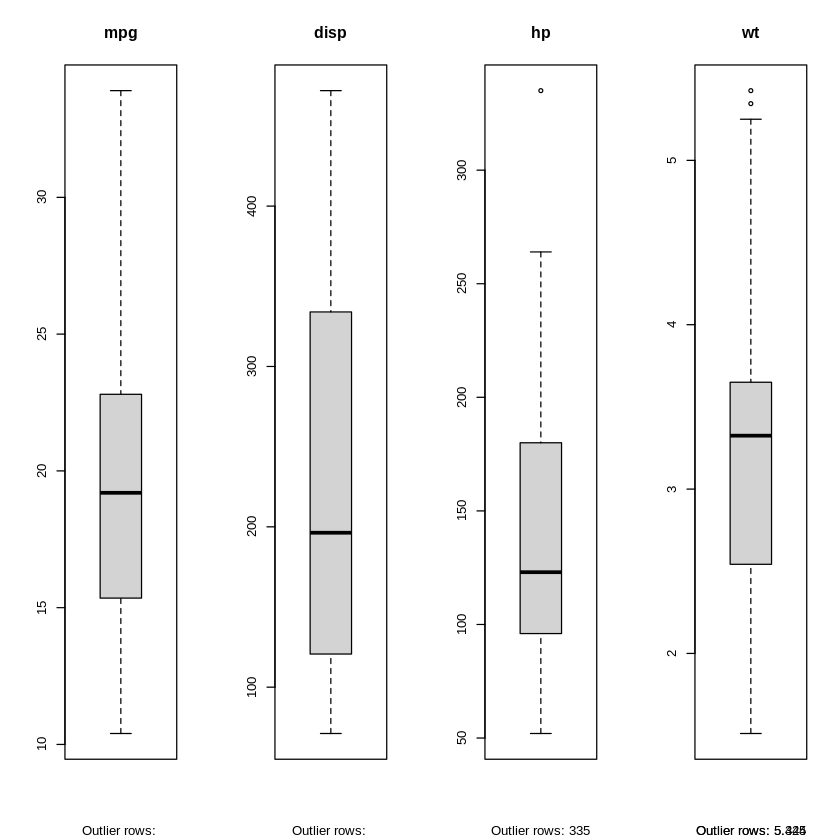

In [ ]:
par(mfrow=c(1,4))
boxplot(input$mpg, main="mpg", sub=paste("Outlier rows:", boxplot.stats(input$mpg)$out))
boxplot(input$disp, main="disp", sub=paste("Outlier rows:", boxplot.stats(input$disp)$out))
boxplot(input$hp, main="hp", sub=paste("Outlier rows:", boxplot.stats(input$hp)$out))
boxplot(input$wt, main="wt", sub=paste("Outlier rows:", boxplot.stats(input$wt)$out))

In [ ]:
boxplot.stats(input$hp)$out

[1] 335

In [ ]:
boxplot.stats(input$wt)$out

[1] 5.424 5.345

In [ ]:
hp_outliers=boxplot.stats(input$hp)$out
print(paste("hp_outliers:",hp_outliers))
print(paste("Numrows: ", sum(input$hp==hp_outliers)))

[1] "hp_outliers: 335"
[1] "Numrows:  1"


In [ ]:
wt_outliers=boxplot.stats(input$wt)$out
print(paste("wt_outliers:",hp_outliers))
print(paste("Numrows: ", sum(input$wt %in% wt_outliers)))

[1] "wt_outliers: 335"
[1] "Numrows:  2"


In [ ]:
print(paste("Before drop:", nrow(input)))

[1] "Before drop: 32"


In [ ]:
input=input[!(input$hp %in% hp_outliers),]
input=input[!(input$wt %in% wt_outliers),]

In [ ]:
print(paste("After drop:", nrow(input)))

[1] "After drop: 29"


In [ ]:
set.seed(42)
trainingRowIndex=sample(1:nrow(input), 0.8*nrow(input))
print("Select training row indexes:")
print(trainingRowIndex)
trainingData=input[trainingRowIndex,]
testData=input[-trainingRowIndex,]
print("Rows of training data and test data:")
print(nrow(trainingData))
print(nrow(testData))

[1] "Select training row indexes:"
 [1] 17  5  1 25 10  4 18 29 15  7 24 28 14 19 26  2  3  9 12 16 23 20 11
[1] "Rows of training data and test data:"
[1] 23
[1] 6


In [ ]:
lmMod=lm(mpg~disp + hp + wt, data=trainingData)
Pred=predict(lmMod, testData)
mse = mean(lmMod$residuals^2)
print(paste("mse: ", mse))
mse_test = mean((testData$mpg -Pred)^2)
print(paste("mse in test: ", mse_test))

[1] "mse:  4.9035236695173"
[1] "mse in test:  4.49282285889091"


In [ ]:
print(summary(lmMod))


Call:
lm(formula = mpg ~ disp + hp + wt, data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5460 -1.2036 -0.3469  1.2579  5.1846 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 41.14944    2.34868  17.520 3.48e-13 ***
disp         0.01320    0.01101   1.199 0.245304    
hp          -0.05281    0.02003  -2.637 0.016260 *  
wt          -5.22157    1.22671  -4.257 0.000427 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.436 on 19 degrees of freedom
Multiple R-squared:  0.859,	Adjusted R-squared:  0.8368 
F-statistic:  38.6 on 3 and 19 DF,  p-value: 2.783e-08



In [ ]:
b=coef(lmMod)[1]
print(b)
mdisp=coef(lmMod)[2]
mhp=coef(lmMod)[3]
mwt=coef(lmMod)[4]
print(mdisp)
print(mhp)
print(mwt)

(Intercept) 
   41.14944 
    disp 
0.013202 
         hp 
-0.05281201 
       wt 
-5.221568 


In [ ]:
x1=221
x2=102
x3=2.91
y=(mdisp*x1+mhp*x2+mwt*x3+b)
print("Solution 1 -results:")
print(y)

[1] "Solution 1 -results:"
   disp 
23.4855 


In [ ]:
y1=predict(lmMod, data.frame(disp=x1, hp=x2, wt=x3))
print("Solution 2 -results:")
print(y1)

[1] "Solution 2 -results:"
      1 
23.4855 


In [ ]:
saveRDS(lmMod,"lmMod_m.rds")

In [ ]:
lmMod_load=readRDS("lmMod_m.rds")

In [ ]:
y2=predict(lmMod_load, data.frame(disp=x1, hp=x2, wt=x3))
print("Results:")
print(y2)

[1] "Results:"
      1 
23.4855 


# Model Selection

In [ ]:
install.packages("BMA")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘DEoptimR’, ‘mvtnorm’, ‘pcaPP’, ‘leaps’, ‘robustbase’, ‘inline’, ‘rrcov’




In [ ]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [ ]:
library(BMA)

Loading required package: survival

Loading required package: leaps

Loading required package: robustbase


Attaching package: ‘robustbase’


The following object is masked from ‘package:survival’:

    heart


Loading required package: inline

Loading required package: rrcov

Scalable Robust Estimators with High Breakdown Point (version 1.7-0)




In [ ]:
cols=colnames(mtcars)
cols

[1] "mpg"  "cyl"  "disp" "hp"   "drat" "wt"   "qsec" "vs"   "am"   "gear"
[11] "carb"

In [ ]:
yvars=mtcars[,("mpg")]
xvars=mtcars[,cols[-1]]
bma=bicreg(xvars, yvars, strict=F, OR=2)

In [ ]:
print(summary(bma))


Call:
bicreg(x = xvars, y = yvars, strict = F, OR = 2)


  5  models were selected
 Best  5  models (cumulative posterior probability =  1 ): 

           p!=0    EV        SD        model 1    model 2    model 3  
Intercept  100.0  27.211564  13.82229    9.61778   39.68626   37.22727
cyl         37.9  -0.489171   0.71049      .       -1.50779      .    
disp         0.0   0.000000   0.00000      .          .          .    
hp          31.5  -0.008011   0.01373      .          .       -0.03177
drat         0.0   0.000000   0.00000      .          .          .    
wt         100.0  -3.816159   0.93260   -3.91650   -3.19097   -3.87783
qsec        45.2   0.505065   0.59539    1.22589      .          .    
vs           0.0   0.000000   0.00000      .          .          .    
am          28.8   0.845872   1.53016    2.93584      .          .    
gear         0.0   0.000000   0.00000      .          .          .    
carb         0.0   0.000000   0.00000      .          .          .    
   

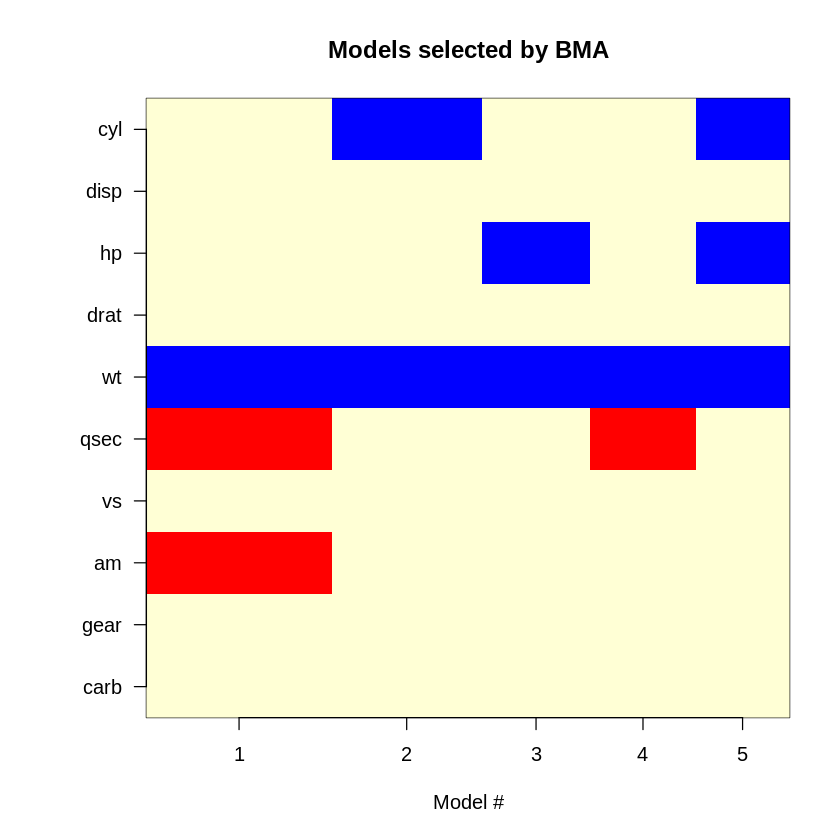

In [ ]:
imageplot.bma(bma)

In [ ]:
install.packages('relaimpo')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘minqa’, ‘numDeriv’, ‘survey’, ‘mitools’, ‘corpcor’




In [ ]:
library('relaimpo')

Loading required package: MASS

Loading required package: boot


Attaching package: ‘boot’


The following object is masked from ‘package:robustbase’:

    salinity


The following object is masked from ‘package:survival’:

    aml


Loading required package: survey

Loading required package: grid

Loading required package: Matrix


Attaching package: ‘survey’


The following object is masked from ‘package:graphics’:

    dotchart


Loading required package: mitools

This is the global version of package relaimpo.


If you are a non-US user, a version with the interesting additional metric pmvd is available


from Ulrike Groempings web site at prof.beuth-hochschule.de/groemping.




In [ ]:
m=lm(mpg~wt +qsec+am,data=mtcars)
calc.relimp(m, type='lmg', rela=T, rank=T)

Response variable: mpg 
Total response variance: 36.3241 
Analysis based on 32 observations 

3 Regressors: 
wt qsec am 
Proportion of variance explained by model: 84.97%
Metrics are normalized to sum to 100% (rela=TRUE). 

Relative importance metrics: 

           lmg
wt   0.5640407
qsec 0.1853428
am   0.2506165

Average coefficients for different model sizes: 

            1X       2Xs       3Xs
wt   -5.344472 -5.200397 -3.916504
qsec  1.412125  1.455534  1.225886
am    7.244939  4.426358  2.935837